# Soluciones a los ejercicios del Capítulo 2

## 2.1 Teoría de la Información y Entropía de Shannon

### Ejercicio 2.1

In [2]:
from math import log2
from matplotlib import pyplot as plt
import numpy as np


def entropy(p_dist):
    """
    Esta funcion calcula la entropía para una lista o arreglo p_dist 
    que contiene a una distribución de probabilidad
    """
    H = 0.0
    for p in p_dist:
        if p != 0: #Por convención, el término en la sumatoria es igual a cero si p = 0
            H += (-p*log2(p))
    return H


def freq_dist_dict(a_string, block_length):
    """
    Esta funcion devuelve un diccionario cuyas claves son los bloques sin repetir de a_string, 
    y cuyos valores son las frecuencias de aparición de dichos bloques dentro de a_string
    """
    nb_blocks = int(len(a_string) / block_length)
    freq_dictionary = {}
    # Inicializamos el diccionario con valores igual a cero
    index = 0
    for k in range(nb_blocks):
        block = a_string[index:index+block_length]
        freq_dictionary[block] = 0.0
        index += block_length
    # Contamos las apariciones de los bloques y las registramos en los respectivos valores 
    index = 0
    for k in range(nb_blocks):
        block = a_string[index:index + block_length]
        freq_dictionary[block] += 1.0
        index += block_length

    return freq_dictionary


def block_entropy(a_string, block_length):
    """Esta función calcula la entropía de bloque para la cadena a_string
    en función del tamaño de bloque
    """
    freq_dictionary = freq_dist_dict(a_string, block_length) # Diccionario de frecuencias
    freq_array = np.array(list(freq_dictionary.values())) # Extraemos los valores de frecuencia en un arreglo 
    p_dist = freq_array/sum(freq_array) # Normalizamos el arreglo de frecuencias
    return entropy(p_dist)

Una vez definida la función <code>block_entropy(a_string, block_length)</code>, asignamos las cadenas a analizar,

In [3]:
s_a = "111111111111"
s_b = "010101010101"
s_c = "111001011000"
s_TM = "011010011001"

donde <code>s_a</code>, <code>s_b</code> y <code>s_c</code> son las cadenas de la Fig. 2.1. Vamos a validar:

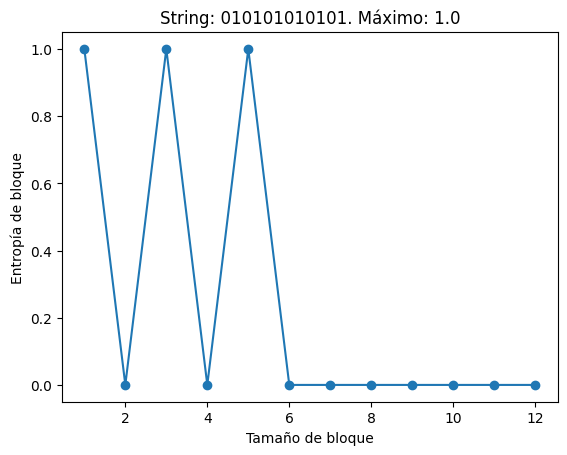

In [4]:
string_to_plot = s_b #asigne s_a, s_b o s_c para validar
entropy_list = [block_entropy(string_to_plot, l) for l in range(1, len(string_to_plot)+1)] # longitudes de bloque de 1 a (longitud de cadena)

plt.plot(range(1, len(string_to_plot)+1), entropy_list, "-o")
plt.title(f"String: {string_to_plot}. Máximo: {max(entropy_list)}")
plt.xlabel("Tamaño de bloque")
plt.ylabel("Entropía de bloque")
plt.show()

Por último, calculamos y graficamos la entropía de bloque de la cadena <code>s_TM</code>,

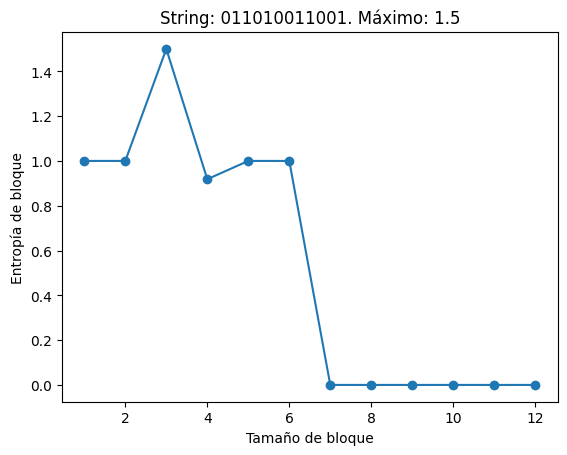

In [5]:
string_to_plot = s_TM
entropy_list = [block_entropy(string_to_plot, l) for l in range(1, len(string_to_plot)+1)] 

plt.plot(range(1, len(string_to_plot)+1), entropy_list, "-o")
plt.title(f"String: {string_to_plot}. Máximo: {max(entropy_list)}")
plt.xlabel("Tamaño de bloque")
plt.ylabel("Entropía de bloque")
plt.show()

## 2.2 Algoritmos de compresión

### Ejercicio 2.2

A continuación se define una función que toma una cadena de entrada <code>uncompressed</code> para comprimirla,

In [1]:
def compress_ratio(uncompressed):
    """Comprime una cadena , y devuelve la cadena codificada junto 
    con la razón de compresibilidad."""
    initial_length = len(uncompressed)

    keys_list = list(sorted(set(uncompressed)))
    dict_size = len(keys_list)
    dictionary = {keys_list[i]:i+1 for i in range(dict_size)} # diccionario inicial

    result = []
    while len(uncompressed) > 0:
        w = uncompressed[0]
        index = 1 # este índice va a localizar al Siguiente símbolo una vez terminado el bucle. Vea Cuadro 2.1
        while w in dictionary:
            wc = w
            if index < len(uncompressed): 
               w += uncompressed[index]
            else:
                break
            index += 1
        # el último caracter de w es el Siguiente simbolo
        result.append(dictionary[wc]) # wc es la Entrada, y dictionary[wc] es la Salida
        # removemos wc al inicio de uncompressed para la siguiente iteración,
        uncompressed = uncompressed.replace(wc, '', 1) 
        dictionary[w] = dict_size + 1 # Agregamos w a diccionario
        dict_size += 1 
    # cadena codificada
    result_string = ''
    for n in result:
        result_string += str(n)

    return result_string,len(result_string)/initial_length

Validamos con la cadena del Ejemplo 2.3,

In [2]:
print(compress_ratio("ababcbababaaaaaaa"))

('124358110111', 0.7058823529411765)


Asignamos las cadenas a evaluar,

In [3]:
s_a = "111111111111"
s_b = "010101010101"
s_c = "111001011000"
s_TM = "011010011001"
strings_list = [s_a, s_b, s_c, s_TM]
strings_labels = ["s_a", "s_b", "s_c", "s_TM"]

Por último, evaluamos,

In [4]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Cadena de entrada", "Cadena codificada", "Razón de compresibilidad"]

for i in range(len(strings_list)):
    codified_string,cmp_ratio = compress_ratio(strings_list[i])
    cmp_ratio = round(cmp_ratio, 3)
    x.add_row([f"{strings_labels[i]} = {strings_list[i]}", codified_string, cmp_ratio])

print(x)

+---------------------+-------------------+--------------------------+
|  Cadena de entrada  | Cadena codificada | Razón de compresibilidad |
+---------------------+-------------------+--------------------------+
|  s_a = 111111111111 |       12342       |          0.417           |
|  s_b = 010101010101 |       123547      |           0.5            |
|  s_c = 111001011000 |      23112675     |          0.667           |
| s_TM = 011010011001 |      12231353     |          0.667           |
+---------------------+-------------------+--------------------------+
